## Задачи
1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя **sns.countplot** (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
## Описание данных
**user_data:**

* client – идентификатор пользователя

* premium – является ли клиент премиум

* age – возраст

**logs:**

* client – идентификатор пользователя

* success – результат (успех - 1, нет - 0)

* platform – платформа

* time – время в формате Unix

**Импортируем библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверим размер таблицы, типы переменных, посмотрите на описательную статистику.**

**Вопрос:** Сколько уникальных значений принимает переменная platform?

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

user_data = pd.read_csv('/Users/pavel/Desktop/karpov/2 МОДУЛЬ PYTHON +/3_user_data.csv')
logs = pd.read_csv('/Users/pavel/Desktop/karpov/2 МОДУЛЬ PYTHON +/3_logs.csv')

In [7]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [8]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [3]:
user_data.shape

(2954, 3)

In [4]:
user_data.dtypes.value_counts()

int64    2
bool     1
Name: count, dtype: int64

In [6]:
logs.shape

(4500, 4)

In [9]:
logs.dtypes.value_counts()

int64     2
bool      1
object    1
Name: count, dtype: int64

In [10]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [11]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [12]:
logs.platform.nunique()

3

**Какой клиент совершил больше всего успешных операций?**

In [82]:
client_succcess = logs.query("success == True").groupby('client').client.value_counts()
max_client_success = client_succcess.max()
client_succcess[client_succcess == max_client_success].index.to_list()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

Ответ: `12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584`

**С какой платформы осуществляется наибольшее количество успешных операций?**

In [86]:
logs.query("success == True").groupby('platform').size()

platform
computer    1090
phone       2019
tablet       180
dtype: int64

* **Phone**

**Какая платформа наиболее популярна среди премиумных клиентов?**

In [108]:
pd.merge(logs, user_data, on = "client").query("premium == True").groupby('platform', as_index = False).\
    agg({'client' : 'nunique'})

,platform,client
0,computer,145
1,phone,242
2,tablet,24


* **Phone**

**Визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет)**

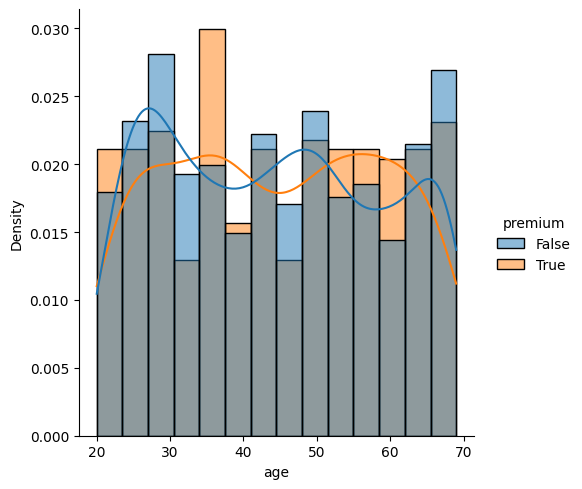

In [127]:
premium_logs = pd.merge(logs, user_data, on = "client")
ax = sns.displot(data = premium_logs,x = 'age', hue = 'premium', kde = True, common_norm = False, kind='hist', 
            stat='density', bins = 14)

**Построим график распределения числа успешных операций:**

x – число успешных операций

y – число клиентов, совершивших столько успешных операций

In [154]:
success_count = logs.query('success == True').client.value_counts()
success_count

client
28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: count, Length: 2845, dtype: int64

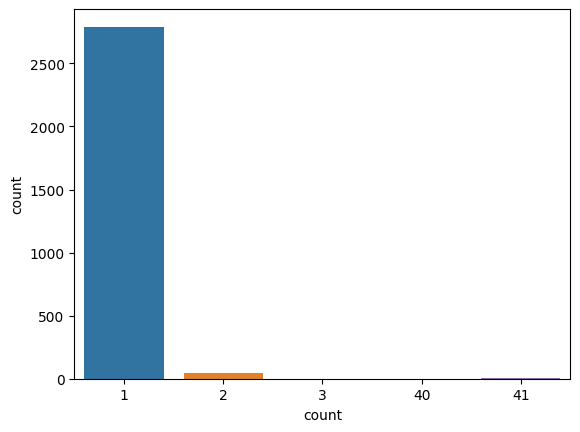

In [155]:
ax = sns.countplot(x = success_count)

* **Несколько клиентов совершили более 40 успешных действий**
* **Бóльшая часть наблюдений сосредоточена в левой части графика**

**Визуализируtv число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций**

In [176]:
merge_data = pd.merge(logs, user_data, on = "client")
success_computer_count = merge_data.query("success == True and platform == 'computer'")
success_computer_count.head()

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25


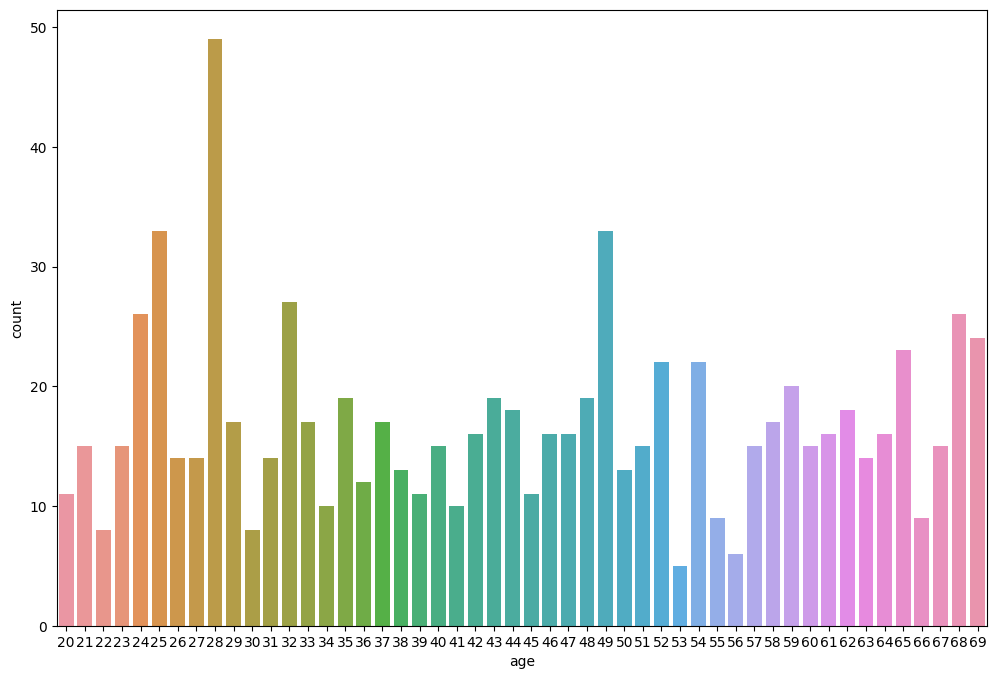

In [177]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data = success_computer_count, x = 'age')